In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from math import sqrt
from pyearth import Earth 
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M']) 

In [2]:
# Check Shape of DataFrame
df_s.shape

(5686, 25)

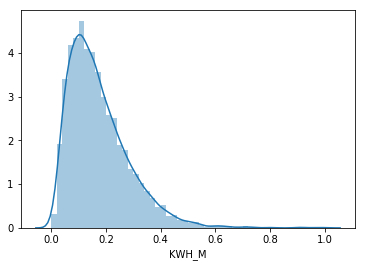

In [3]:
# Check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

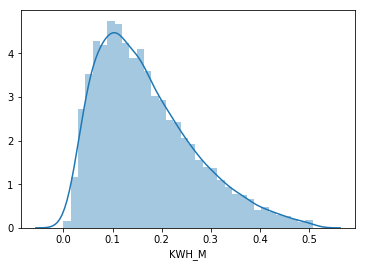

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
# Re-check the DataFrame's shape 
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

In [7]:
# Fit the MARS model to the data and Calculate Scores for Root Mean Square Error (RMSE)
mars = Earth(max_degree=10, penalty=10.0, endspan=5)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(mars, X, Y, cv=shuffle, scoring = 'neg_mean_squared_error')
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

The RMSE scores are [0.03881984 0.03782595 0.0595042  0.03705985 0.04048273 0.03853449
 0.03894632 0.03894323 0.04210793 0.03843264]
The mean of the RMSE scores is 0.041066


/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [8]:
# Calculate Scores for Mean Absolute Error (MAE)
mars = Earth(max_degree=10, penalty=10.0, endspan=5)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores = cross_val_score(mars, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The mean absolute error scores are %s" 
       % (mae_scores_))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores_.mean()))

/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

The mean absolute error scores are [0.0267972  0.02668704 0.03194981 0.02671712 0.02786708 0.02685534
 0.02660285 0.02700234 0.02975468 0.02652795]
The mean of the mean absolute error scores is 0.027676


/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [9]:
# Cross Val Scores for Explained Variance (VAR)
from sklearn.metrics import mean_absolute_error

mars = Earth(max_degree=10, penalty=10.0, endspan=5)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

ev_scores = cross_val_score(mars, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

The explained variance scores are [0.84451576 0.86629552 0.66650724 0.85278632 0.82888435 0.83139139
 0.83774912 0.85236598 0.82054117 0.86766579]
The mean of the explained variance scores is 0.826870


/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [10]:
# R2 Scores  
from sklearn.metrics import mean_absolute_error

mars = Earth(max_degree=10, penalty=10.0, endspan=5)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(mars, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

The R2 scores are [0.84446105 0.86546204 0.66581833 0.85275246 0.82885923 0.83122764
 0.83754522 0.85232434 0.82052557 0.86765625]
The mean of the R2 scores is 0.826663


/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/williamadams/anaconda3/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N

Text(0.5,1,'Multivariate Adaptive Regression Splines')

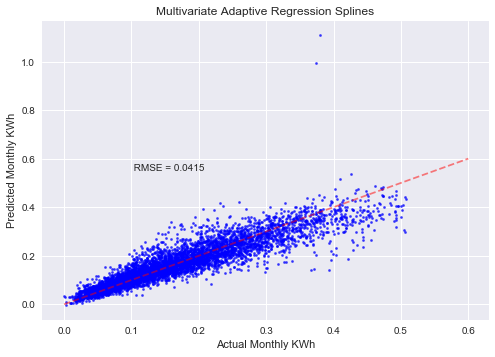

In [13]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_mars = cross_val_predict(mars, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_mars, s = 5, color = 'blue', alpha = 0.8)
plt.plot([0,0.6], [0,0.6], "b--", color = "red", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_mars)), 4)))
plt.title('Multivariate Adaptive Regression Splines')